### Assignment 2 : Implementing Feedforward Neural Network with Keras and Tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Set up TensorFlow

In [2]:
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.10.0


### Loading the Dataset

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


### Build a machine learning model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(436, activation='relu'),
    tf.keras.layers.Dense(123, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

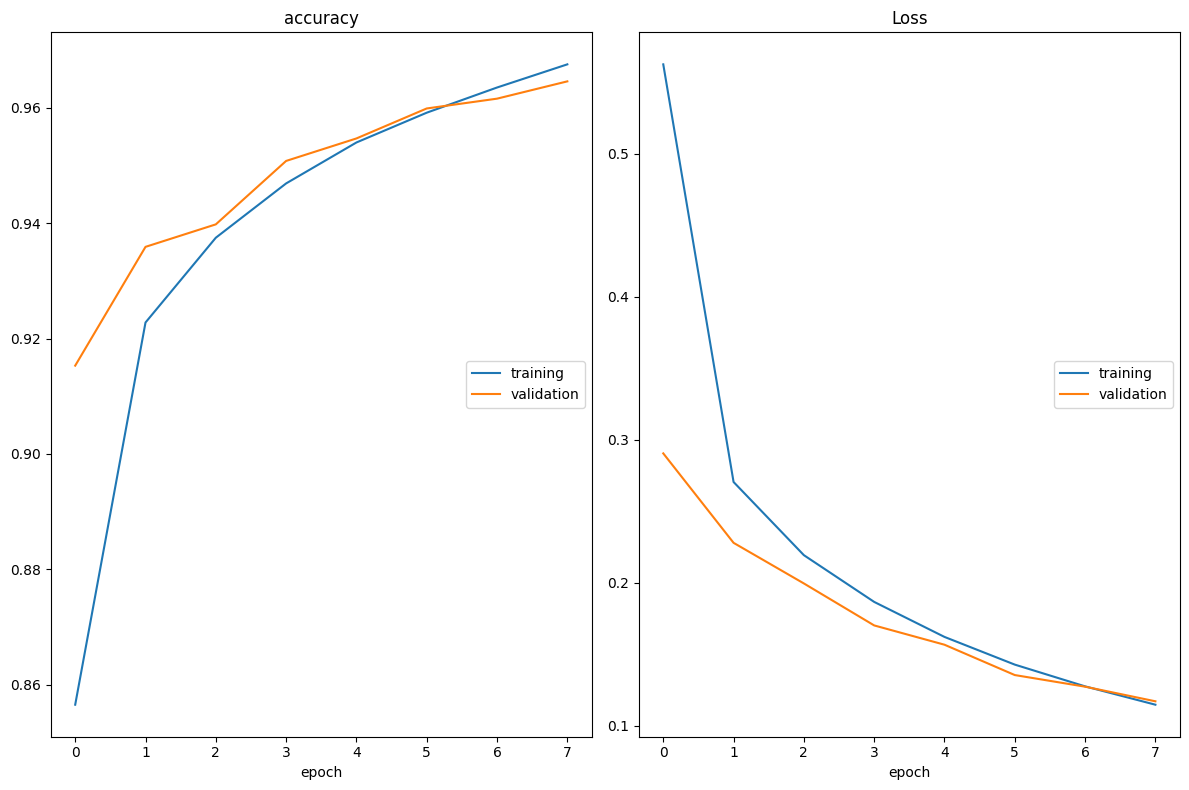

accuracy
	training         	 (min:    0.857, max:    0.968, cur:    0.968)
	validation       	 (min:    0.915, max:    0.965, cur:    0.965)
Loss
	training         	 (min:    0.115, max:    0.563, cur:    0.115)
	validation       	 (min:    0.117, max:    0.291, cur:    0.117)


In [5]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

H = model.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test), 
    epochs=8, 
    callbacks=[PlotLossesKeras()], 
    verbose=0
)

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1172 - accuracy: 0.9646
Loss:  0.11720078438520432
Accuracy:  0.9646000266075134


In [15]:
import random

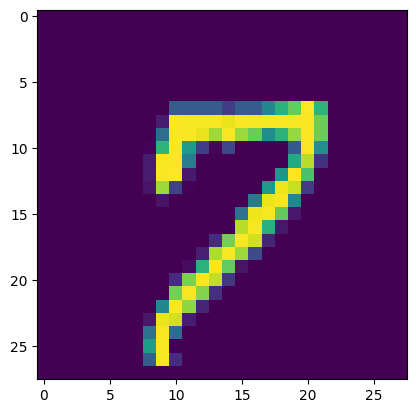

313/313 [==============================] - 1s 2ms/step
The handwritten number in the image is  7


In [19]:
n = random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()
prediction = model.predict(x_test)
print("The handwritten number in the image is ", np.argmax(prediction[n]))

In [9]:
# loss_train = H.history['loss']
# accuracy = H.history['accuracy']

# epochs = np.array([1,2,3,4,5,6,7,8,9,10])
# plt.plot(epochs, accuracy, label='accuracy')
# plt.plot(epochs, loss_train, label='loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()